<a href="https://colab.research.google.com/github/davidpalacio1/TP-1-LDD/blob/main/TPLDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/davidpalacio1/TP-1-LDD/blob/main/TP_revision_final_caos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 - Laboratorio de Datos  
## Verano 2026
## EcoBicis - Ciudad Universitaria  

**Universidad de Buenos Aires**  
**Facultad de Ciencias Exactas y Naturales (FCEyN)**  
<br>


**Integrantes:** Lautaro Herrera - Nicolas Corral - David Palacio Velásquez
<br>
**Fecha:** 23 de febrero de 2026  

<br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold

# Herramientas de modelos lineales
from sklearn import linear_model

# Medidas de desempeño
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Procesamiento de datos

En esta primera sección, vamos a implementar algunas acciones básicas de selección y procesamiento
de nuestros datos. La idea sería quedarnos con un objeto llamado datos_limpios.


In [2]:
# Cargamos el dataset "full_data.csv":

datos = pd.read_csv ("full_data.csv")


## Ejercicio 1

Del dataFrame "datos" nos quedamos solo con las columnas:

- station id,
- num bikes available,
- num bikes disabled,
- num docks available,
- num docks disabled,
- Date,
- hora,
- dia.

In [3]:
# Para que sea mas prolijo, creamos primero una lista de las columnas que queremos obtener del df "datos":
columnas_seleccionadas = [
    "station_id",
    "num_bikes_available",
    "num_bikes_disabled",
    "num_docks_available",
    "num_docks_disabled",
    "Date",
    "hora",
    "dia"
]

datos_limpios = datos[columnas_seleccionadas].copy()

# Verificamos si se guardó correctamente el nuevo dataframe. Para ello usamos el método head para darle un vistazo a las primeras filas:

datos_limpios.head()

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,Date,hora,dia
0,420,3,1,8,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,2025-04-29,01:13:46,Tuesday


## Ejercicio 2

Pasamos todos los nombres de columna a español utilizando un diccionario. Los nuevos nombres
son:

- "estacion" para "station_id"
- "bicis disponibles" para "num_bikes_available"
- "bicis rotas" para "num_bikes_disabled"
- "puertos disponibles" para "num_docks_available"
- "puertos rotos" para "num_docks_disabled"
- "fecha" para "Date"
- "horario" para "hora"
- "dia semana" para "dia"


Para esto primero definimos un diccionario donde las claves son los nombres de las columnas a modificar y el valor los nuevos nombres.
Luego usamos el método rename de pandas para modificar las columnas antes nombradas.

In [4]:
# Definimos un diccionario para traducir los nombres:

diccionario_Traducción = {
    "station_id": "estacion",
    "num_bikes_available": "bicis_disponibles",
    "num_bikes_disabled": "bicis_rotas",
    "num_docks_available": "puertos_disponibles",
    "num_docks_disabled": "puertos_rotos",
    "Date": "fecha",
    "hora": "horario",
    "dia": "dia_semana"
}

# Aplicamos la traducción:

datos_limpios = datos_limpios.rename(columns=diccionario_Traducción)

In [5]:
# Damos un vistazo de como quedó el archivo con este cambio:

datos_limpios.columns

# Los cambios se aplicaron con exito

Index(['estacion', 'bicis_disponibles', 'bicis_rotas', 'puertos_disponibles',
       'puertos_rotos', 'fecha', 'horario', 'dia_semana'],
      dtype='object')

## Ejercicio 3

Pasar los días de la variable dia a español (pueden usar map con un diccionario o alguna función
específica para fechas).

Ahora vamos a traducir los dias de la columna "dia_semana" al español utilizando un diccionario, con la misma idea de antes, simplemente que por un tema de eficiencia vamos a utilizar la función "map" y no "replace".

In [6]:
# Definimos un diccionario para traducir los días:

diccionario_Dias = {
    "Monday" : "Lunes",
    "Tuesday" : "Martes",
    "Wednesday" : "Miercoles",
    "Thursday" : "Jueves",
    "Friday" : "Viernes",
    "Saturday" : "Sabado",
    "Sunday" : "Domingo"
}
# Aplicamos la traducción:

datos_limpios["dia_semana"] = datos_limpios["dia_semana"].map(diccionario_Dias)

datos_limpios.head()

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana
0,420,3,1,8,0,2025-04-28,23:28:05,Lunes
1,464,11,2,7,0,2025-04-28,23:28:05,Lunes
2,420,5,1,6,1,2025-04-29,00:32:59,Martes
3,464,11,2,7,0,2025-04-29,00:32:59,Martes
4,420,5,1,6,1,2025-04-29,01:13:46,Martes


## Ejercicio 4

¿Cuáles son los distintos tipos de variables que tenemos ahora?

Verificamos que tipo de datos contiene nuestro DataFrame. Se presentan dos formas de hacerlo:  La primera revisando por columna y la segunda, más compacta, nos muestra una lista donde cada elemento es un tipo de dato dentro del df.

In [7]:
print(datos_limpios.dtypes)

# Una lista con los tipos de datos. Tengo Enteros (Int64) y Objects (O):

list(datos_limpios.dtypes.unique())

estacion                int64
bicis_disponibles       int64
bicis_rotas             int64
puertos_disponibles     int64
puertos_rotos           int64
fecha                  object
horario                object
dia_semana             object
dtype: object


[dtype('int64'), dtype('O')]

Se tienen datos numéricos y categóricos:

1. Numéricos

    - bicis_disponibles (Tipo int64)

    - bicis_rotas (Tipo int64)

    - puertos_disponibles (Tipo int64)

    - puertos_rotos (Tipo int64)


2. Categóricas:

    - estacion ( Aunque aparece con tipo int64)


Respecto a los datos temporales, se tiene: fecha, horario y dia_semana, de tipo object.

## Ejercicio 5

¿La base de datos contiene datos faltantes? ¿Cuántos?

Veremos a continuacion si el df contiene datos faltantes, usando los métodos encadenados isna().sum(). El primer método mira si en una posicion falta el dato o no y se crea una mascara sobre las posiciones con True si falta el dato o False en caso  contrario. Luego sum suma los valores booleanos, donde a True los interpreta como 1 y 0 a False.

In [8]:
# Se revisa si hay datos faltantes:

total_faltantes = datos_limpios.isna().sum().sum()

print("La cantidad de datos faltantes del df 'datos_limpios' es ",total_faltantes)


La cantidad de datos faltantes del df 'datos_limpios' es  0


No existen valores faltantes en el dataset.

## Ejercicio 6

Los datos de fechas y hora son bastante complejos de manejar. Una forma bastante simple
de hacerlo ser´ıa generar las variables ”anio”, ”mes”, ”dia” y ”hora” extrayendo la informaci´on
consecuente de los strings de ”fecha” y ”horario”. Verific´a que las variables resultantes sean
num´ericas (o convertilas a num´ericas si fuera necesario).

In [9]:
# Antes de continuar, verificamos que las fechas en fecha estén en formato Año-Mes-Día ("YYY-MM-DD") y las horas en formato Hora:Minuto:segundo (formato HH:MM:SS):

print("Longitud de la variable 'fecha':")
print(datos_limpios["fecha"].str.len().value_counts())
print("\nInterpretación: Todas las fechas deberían tener longitud 10 (formato YYYY-MM-DD)\n")


# Antes de continuar, verificamos que las horas en horario estén en formato Hora:Minuto:Segundo ("HH:MM:SS"):

print("Longitud de la variable","horario")
print(datos_limpios["horario"].str.len().value_counts())
print("\nInterpretación: Todas las horas deberían tener longitud 8 (formato HH:MM:SS).")

Longitud de la variable 'fecha':
fecha
10    12528
Name: count, dtype: int64

Interpretación: Todas las fechas deberían tener longitud 10 (formato YYYY-MM-DD)

Longitud de la variable horario
horario
8    12528
Name: count, dtype: int64

Interpretación: Todas las horas deberían tener longitud 8 (formato HH:MM:SS).


In [10]:
# Para fecha, en las posiciones 4 y 7 solo debemos tener guiones:


(
    (datos_limpios["fecha"].str[4] == "-") &
    (datos_limpios["fecha"].str[7] == "-")
).value_counts()

fecha
True    12528
Name: count, dtype: int64

In [11]:
# Para hora, en las posiciones 2 y 5 solo debemos tener dos puntos:


(
    (datos_limpios["horario"].str[2] == ":") &
    (datos_limpios["horario"].str[5] == ":")
).value_counts()

horario
True    12528
Name: count, dtype: int64

Se verificó que los datos para fecha tiene longitud 10 y para horario tienen longitud 8, en la totalidad de las 12.528 observaciones, lo cual es coherente con el formato. Continuamos con la resolución del ejercicio 6:

In [12]:
# Para extraer año, mes y día desde fecha, con el formato "YYYY-MM-DD", teniendo en cuenta que los datos en las posiciones 4 y 7 corresponde a guiones:

datos_limpios["anio"] = datos_limpios["fecha"].str[0:4] # Los valores en las posiciones 0 a 3 corresponden al año.

datos_limpios["mes"] = datos_limpios["fecha"].str[5:7] # Los valores en las posiciones 5 y 6  corresponden al año.

datos_limpios["dia"] = datos_limpios["fecha"].str[8:10] # Los valores en las posiciones 8 y 9 corresponden al año.

In [13]:
# Para extraer hora desde horario, con el formato "HH:MM:SS", teniendo en cuenta que los datos en las posiciones 2 y 5 corresponde a guiones:

datos_limpios["hora"] = datos_limpios["horario"].str[0:2] # Los valores en las posiciones 0 y 1 corresponden a la hora.

In [14]:
# Verificamos los tipos:

datos_limpios[["anio","mes","dia","hora"]].dtypes

anio    object
mes     object
dia     object
hora    object
dtype: object

In [15]:
# Son de tipo Object. Los convertimos a variables numéricas:

datos_limpios["anio"] = datos_limpios["anio"].astype(int)
datos_limpios["mes"] = datos_limpios["mes"].astype(int)
datos_limpios["dia"] = datos_limpios["dia"].astype(int)
datos_limpios["hora"] = datos_limpios["hora"].astype(int)

In [16]:
# Verificamos que ahora los tipos sean de variables numéricas:

datos_limpios[["anio","mes","dia","hora"]].dtypes

anio    int64
mes     int64
dia     int64
hora    int64
dtype: object

## Ejercicio 7

Otra forma de manejar las fechas y horas es pasarlas al formato datetime. Para esto, usaremos
el siguiente bloque de código:
datos_limpios [" fecha "] =
pd . to_datetime ( datos_limpios [" fecha "])
datos_limpios [" hora "] =
pd . to_datetime ( datos_limpios [" hora "]) . dt . time


In [17]:
# Convertimos los datos a formato datetime:

datos_limpios["fecha"] = pd.to_datetime(datos_limpios["fecha"])
datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"])



/tmp/ipykernel_152804/1400464593.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos_limpios["horario"] = pd.to_datetime(datos_limpios["horario"])


In [18]:
datos_limpios[["fecha","horario"]].dtypes

fecha      datetime64[ns]
horario    datetime64[ns]
dtype: object

In [19]:
# Extraemos variables numéricas:

datos_limpios["anio"] = datos_limpios["fecha"].dt.year
datos_limpios["mes"] = datos_limpios["fecha"].dt.month
datos_limpios["dia"] = datos_limpios["fecha"].dt.day
datos_limpios["hora"] = datos_limpios["horario"].dt.hour

In [20]:
# Verificamos los tipos de datos:

datos_limpios[["anio", "mes", "dia", "hora"]].dtypes

anio    int32
mes     int32
dia     int32
hora    int32
dtype: object

## Ejercicio 8

Implementá una función llamada determinar_estacion_anio que permita construir una variable llamada estacion_anio al pasarle nuestros datos. La variable puede estar construida a
partir de las variables ”dia” y ”mes” o de la variable ”fecha” (opción para valientes).


Implementamos la función llamada "determinar_estacion_anio" que permite construir una variable llamada "estacion_anio" al pasarle nuestros datos. La variable está construida a partir de las variables "dia" y "mes".




In [21]:
# Usamos estas fechas:  Verano 21 dic a 20 mar ; Otoño 21 mar a 20 jun ; Invierno 21 jun a 20 sep ; Primavera 21 sep a 20 dic.

# A partir de día y mes:

def determinar_estacion_anio(df):

    mes = df["mes"]
    dia = df["dia"]

    condiciones = [
        # Verano: 21 dic – 20 mar
        ((mes == 12) & (dia >= 21)) |
        (mes.isin([1, 2])) |
        ((mes == 3) & (dia <= 20)),

        # Otoño: 21 mar – 20 jun
        ((mes == 3) & (dia >= 21)) |
        (mes.isin([4, 5])) |
        ((mes == 6) & (dia <= 20)),

        # Invierno: 21 jun – 20 sep
        ((mes == 6) & (dia >= 21)) |
        (mes.isin([7, 8])) |
        ((mes == 9) & (dia <= 20)),

        # Primavera: 21 sep – 20 dic
        ((mes == 9) & (dia >= 21)) |
        (mes.isin([10, 11])) |
        ((mes == 12) & (dia <= 20))
    ]

    estaciones = ["Verano", "Otoño", "Invierno", "Primavera"]


    df["estacion_anio"] = np.select(condiciones, estaciones, default="Sin estacion")


    return df

In [22]:
# Aplicamos la función:

datos_limpios = determinar_estacion_anio(datos_limpios)

# Verificamos:

print(datos_limpios["estacion_anio"].unique()) #para mirar las categorías que contiene esta columna

print(datos_limpios["estacion_anio"].value_counts())

# Se implementó la función `determinar_estacion_anio` para clasificar cada observación según la estación del año.
#La clasificación se realizó utilizando las variables `mes` y `dia`, considerando las fechas de cambio de estación en Argentina.

['Otoño' 'Invierno' 'Primavera' 'Verano']
estacion_anio
Primavera    4078
Invierno     4036
Otoño        2380
Verano       2034
Name: count, dtype: int64


In [23]:
# Verificamos:

datos_limpios["estacion_anio"].value_counts()

estacion_anio
Primavera    4078
Invierno     4036
Otoño        2380
Verano       2034
Name: count, dtype: int64

In [24]:
datos_limpios["estacion_anio"].value_counts().sort_index()

estacion_anio
Invierno     4036
Otoño        2380
Primavera    4078
Verano       2034
Name: count, dtype: int64

Se observa que las observaciones se distribuyen de manera relativamente equilibrada entre las cuatro estaciones, lo cual sugiere que la clasificación fue implementada correctamente y no existen errores sistemáticos en la asignación.

# Análisis descriptivo

In [25]:
datos_limpios

,estacion,bicis_disponibles,bicis_rotas,puertos_disponibles,puertos_rotos,fecha,horario,dia_semana,anio,mes,dia,hora,estacion_anio
0,420,3,1,8,0,2025-04-28,2026-02-23 23:28:05,Lunes,2025,4,28,23,Otoño
1,464,11,2,7,0,2025-04-28,2026-02-23 23:28:05,Lunes,2025,4,28,23,Otoño
2,420,5,1,6,1,2025-04-29,2026-02-23 00:32:59,Martes,2025,4,29,0,Otoño
3,464,11,2,7,0,2025-04-29,2026-02-23 00:32:59,Martes,2025,4,29,0,Otoño
4,420,5,1,6,1,2025-04-29,2026-02-23 01:13:46,Martes,2025,4,29,1,Otoño
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12523,464,1,0,19,0,2026-02-06,2026-02-23 14:34:54,Viernes,2026,2,6,14,Verano
12524,420,3,3,6,0,2026-02-06,2026-02-23 15:36:04,Viernes,2026,2,6,15,Verano
12525,464,1,0,19,0,2026-02-06,2026-02-23 15:36:04,Viernes,2026,2,6,15,Verano
12526,420,1,3,8,0,2026-02-06,2026-02-23 16:31:56,Viernes,2026,2,6,16,Verano


## Ejercicio 9

Quisiéramos analizar la cantidad de bicis disponibles por hora, la cantidad de bicis rotas, y
la cantidad de puertos disponibles en todo Ciudad Universitaria (es decir, sumando la información de las dos estaciones). Para eso, generen un nuevo dataframe agrupado por fecha y
hora llamado datos agrupados que contenga las variables ”cantidad bicis disponibles”, ”cantidad bicis rotas”, ”cantidad puertos disponibles”, y conserve las variables ”fecha”, ”hora”,
”dia semana”, ”dia”, ”mes” y ”anio”.


A continuacion generamos un nuevo dataFrame llamado "datos_agrupados" que contiene la cantidad de bicis disponibles, la cantidad de bicis rotas, la cantidad de puertos disponibles en toda Ciudad universitaria, es decir sumando estas cantidades de ambas estaciones, además conservando las columnas "fecha", "hora", "dia_semana", "dia", "mes" y "anio".

Para analizar la disponibilidad total en Ciudad Universitaria, se construyó un nuevo dataframe agrupado por fecha y hora, sumando la información de ambas estaciones.

Se agregaron las siguientes variables:

- cantidad_bicis_disponibles

- cantidad_bicis_rotas

- cantidad_puertos_disponibles

Y se conservaron:

- fecha

- hora

- dia_semana

- dia

- mes

- anio

In [26]:
datos_agrupados = (
    datos_limpios
    .groupby(["fecha", "hora", "dia_semana", "dia", "mes", "anio"], as_index=False)
    [["bicis_disponibles","bicis_rotas","puertos_disponibles"]] #con esto declaramos a que columna le queremos aplicar la funcion 'sum'
    .agg("sum")
)


In [27]:
# Renombramos para que quede más claro
nuevos_nombres={
    "bicis_disponibles": "cantidad_bicis_disponibles",
    "bicis_rotas": "cantidad_bicis_rotas",
    "puertos_disponibles": "cantidad_puertos_disponibles"
}
datos_agrupados = datos_agrupados.rename(columns=nuevos_nombres)

# Verificamos:

datos_agrupados.head()


,fecha,hora,dia_semana,dia,mes,anio,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles
0,2025-04-28,23,Lunes,28,4,2025,14,3,15
1,2025-04-29,0,Martes,29,4,2025,16,3,13
2,2025-04-29,1,Martes,29,4,2025,16,3,13
3,2025-04-29,2,Martes,29,4,2025,16,3,13
4,2025-04-29,3,Martes,29,4,2025,16,3,13


## Ejercicio 10

¿En qué estación del año suele haber más bicis disponibles y puertos disponibles? Justificá tu
respuesta visualmente. ¿Cómo explicarías esa tendencia?


A continuación vamos a crear un nuevo dataframe llamado "datos_por_temporada", en este podremos ver la cantidad total de bicis
    y puertos disponibles, tambien la cantidad de bicis rotas por temporada del año.

In [28]:
datos_por_temporada=(
    determinar_estacion_anio(datos_agrupados)
    .groupby("estacion_anio",as_index=False)
    .agg({"cantidad_bicis_disponibles":"sum","cantidad_puertos_disponibles":"sum","cantidad_bicis_rotas":"sum"})
)

In [29]:
datos_por_temporada

,estacion_anio,cantidad_bicis_disponibles,cantidad_puertos_disponibles,cantidad_bicis_rotas
0,Invierno,23765,36356,4435
1,Otoño,14411,20701,2745
2,Primavera,9961,49238,6049
3,Verano,8792,21147,2605


 Ahora le agregamos una nueva columna al df que nos da cuenta de la capacidad total de bicis por temporada, sin contar la
 cantidad de bicis rotas

In [30]:
datos_por_temporada["capacidad_total_bicis_utilizables"]=datos_por_temporada["cantidad_bicis_disponibles"]+datos_por_temporada["cantidad_puertos_disponibles"]
datos_por_temporada

,estacion_anio,cantidad_bicis_disponibles,cantidad_puertos_disponibles,cantidad_bicis_rotas,capacidad_total_bicis_utilizables
0,Invierno,23765,36356,4435,60121
1,Otoño,14411,20701,2745,35112
2,Primavera,9961,49238,6049,59199
3,Verano,8792,21147,2605,29939


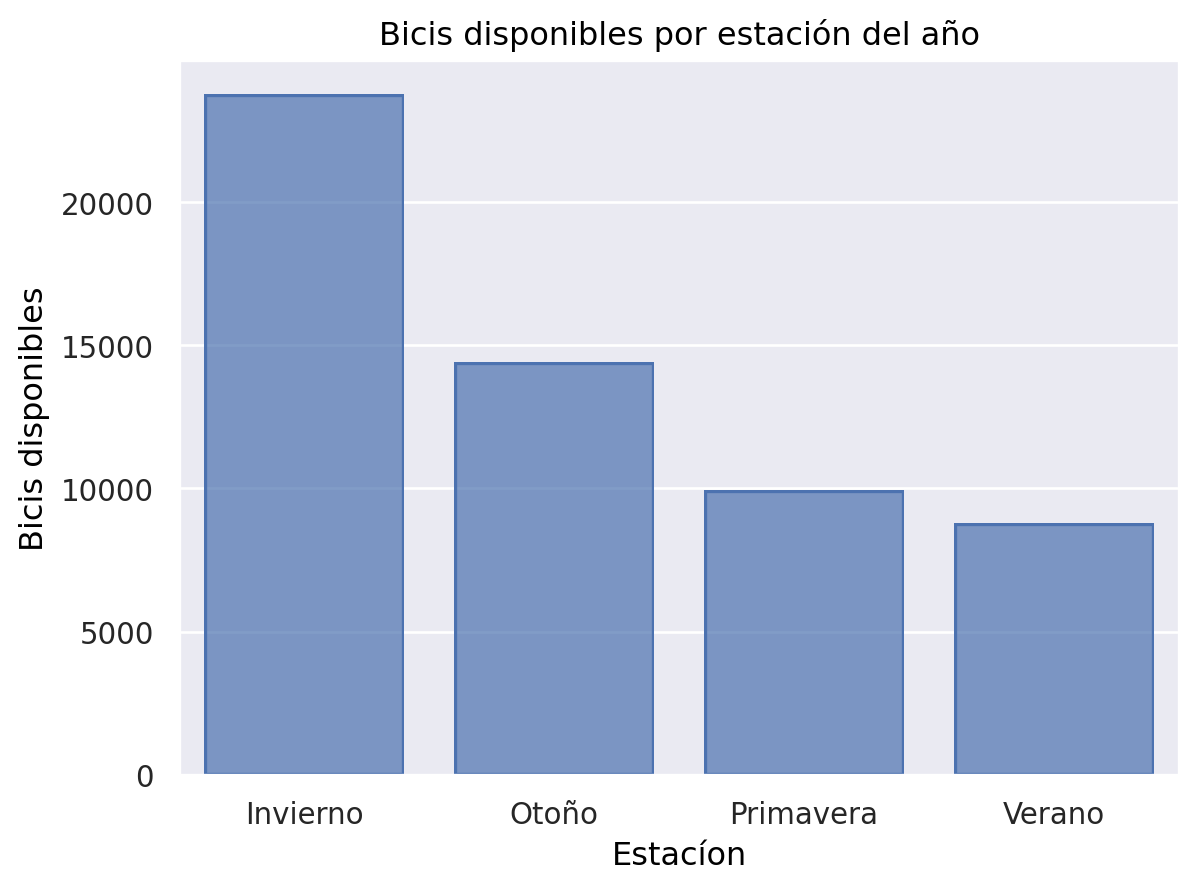

In [31]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_bicis_disponibles")
    .add(so.Bar())
    .label(title="Bicis disponibles por estación del año",x="Estacíon",y="Bicis disponibles")
)

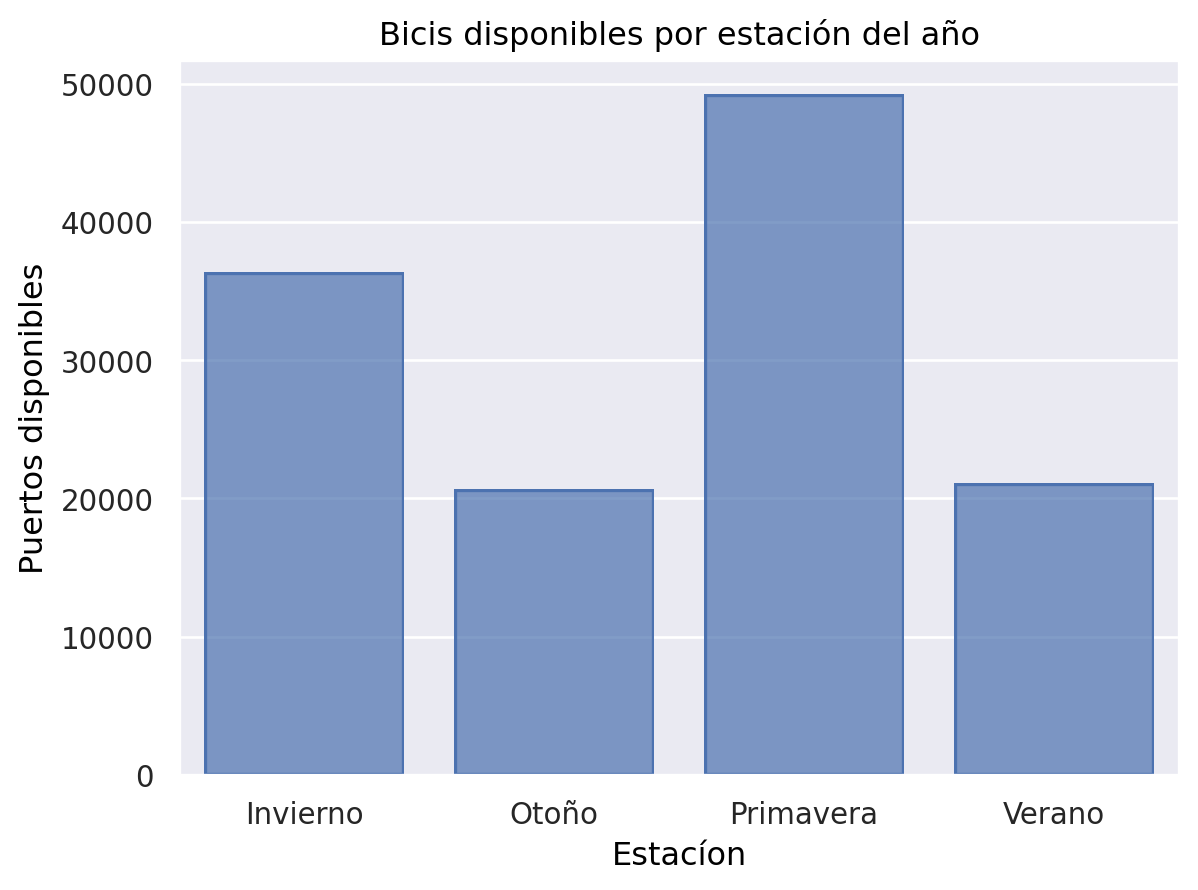

In [32]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_puertos_disponibles")
    .add(so.Bar())
    .label(title="Bicis disponibles por estación del año",x="Estacíon",y="Puertos disponibles")
)

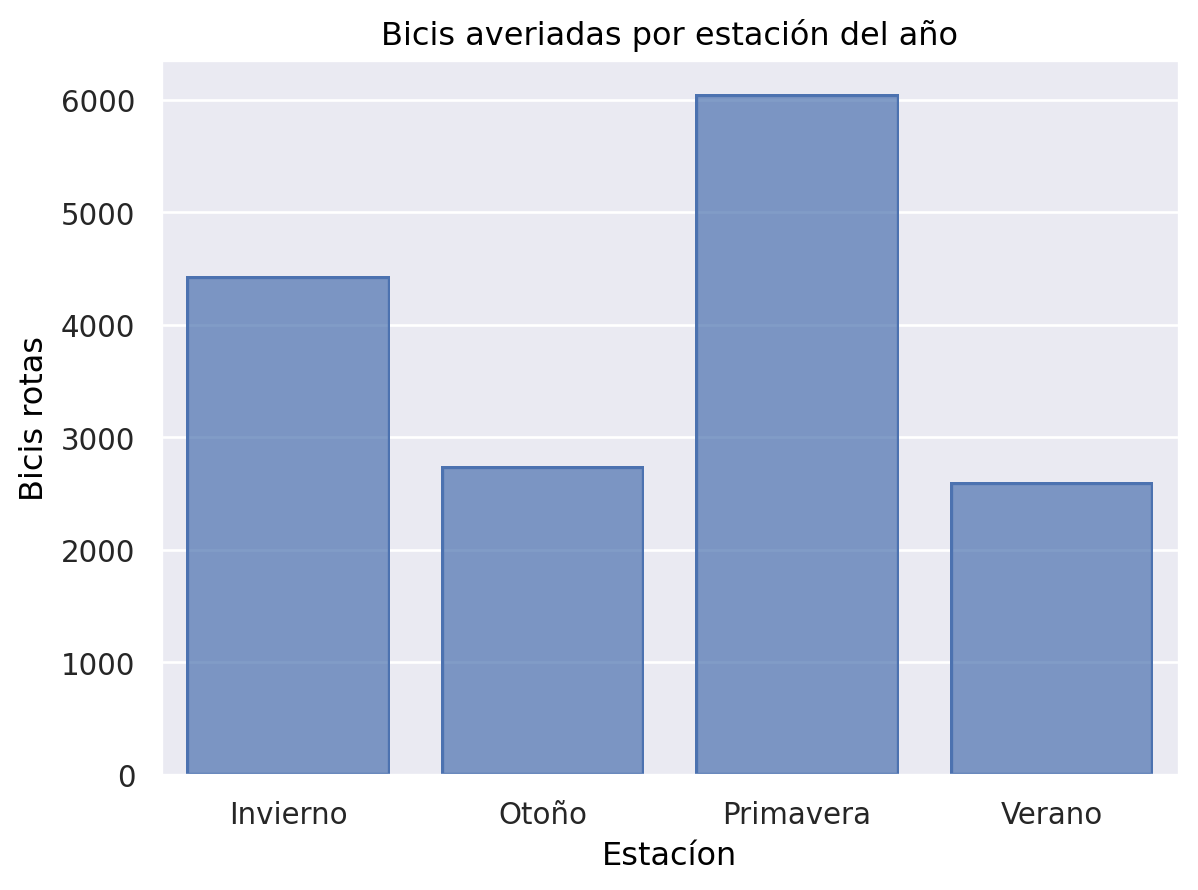

In [33]:
(
    so.Plot(data=datos_por_temporada,x="estacion_anio",y="cantidad_bicis_rotas")
    .add(so.Bar())
    .label(title="Bicis averiadas por estación del año",x="Estacíon",y="Bicis rotas")
)

# Ejercicio 11
A continuacion veremos como varia la cantidad promedio de bicis y puertos disponibles por hora y dia de la semana?


In [34]:
# Promedios por día de la semana y hora:

cantidades_promedios=(datos_agrupados
      .groupby(["dia_semana","hora"],as_index=False)
      [["cantidad_puertos_disponibles","cantidad_bicis_disponibles"]]
      .agg("mean").round())

# Cambiamos el nombre de las columnas:

nuevos_nombres=(
    {"cantidad_puertos_disponibles":"cantidad_puertos_disponibles(promedio)","cantidad_bicis_disponibles":"cantidad_bicis_disponibles(promedio)"}
)

cantidades_promedios = cantidades_promedios.rename(columns=nuevos_nombres)


In [35]:
#Para que el gráfico no los ponga en orden alfabético:


cantidades_promedios

dias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

cantidades_promedios["dia_semana"] = pd.Categorical(
    cantidades_promedios["dia_semana"],
    categories=dias, ordered=True
)

In [36]:
# Fijamos la escala vertical para todos los paneles, así evito posibles deformaciones como consecuencia de que cada panel se ajuste por su rango:

min_bicis = cantidades_promedios["cantidad_bicis_disponibles(promedio)"].min()
max_bicis = cantidades_promedios["cantidad_bicis_disponibles(promedio)"].max()

min_puertos = cantidades_promedios["cantidad_puertos_disponibles(promedio)"].min()
max_puertos = cantidades_promedios["cantidad_puertos_disponibles(promedio)"].max()


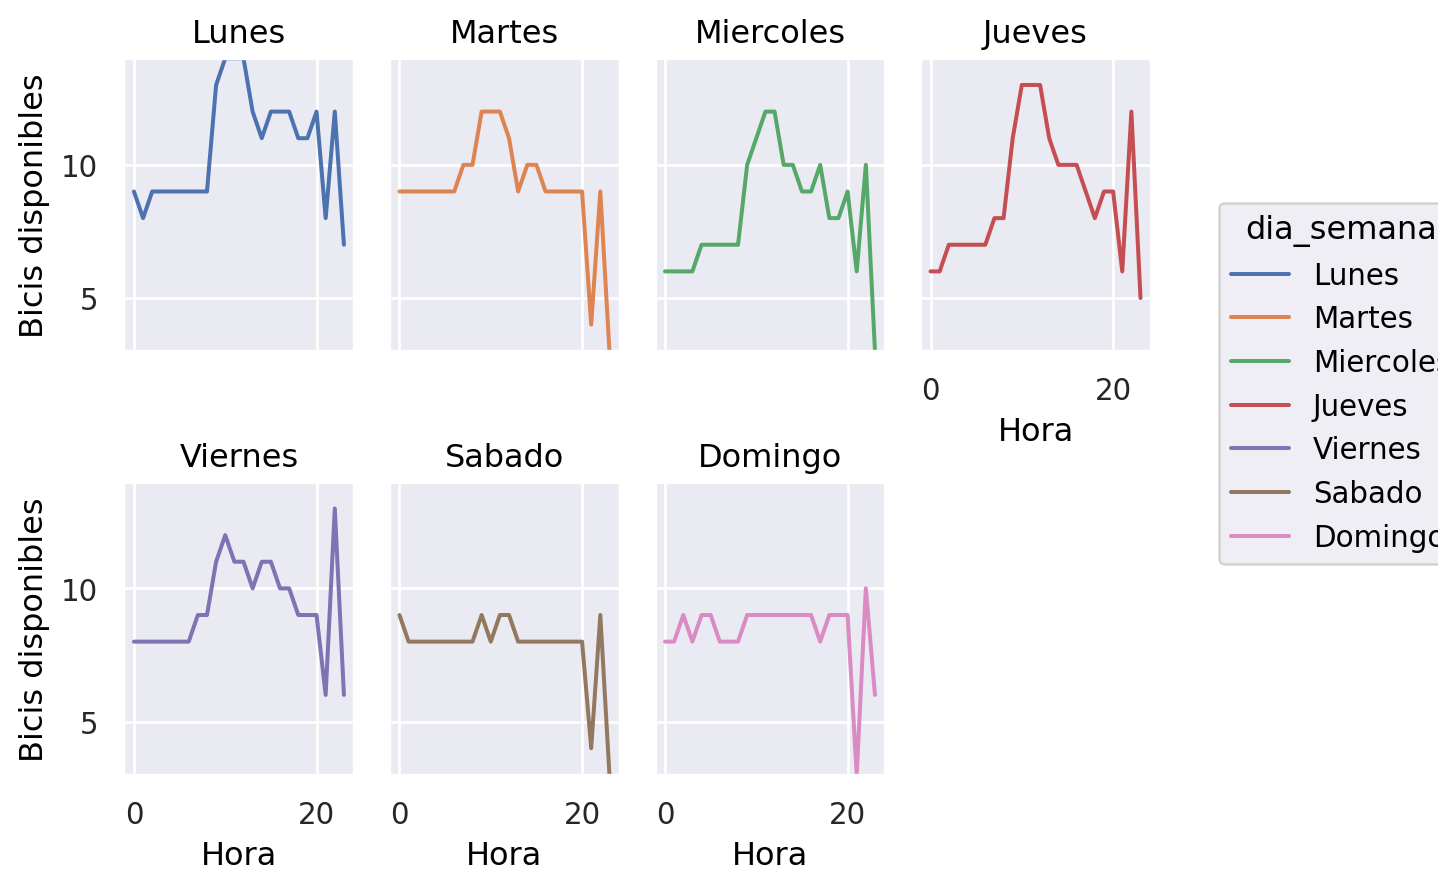

In [37]:
# Gráficamos la cantidad promedio de bicis disponibles para cada día de la semana:

(
    so.Plot(
        cantidades_promedios,
        x = "hora",
        y = "cantidad_bicis_disponibles(promedio)",
        color="dia_semana"
    )
    .facet(col="dia_semana", wrap=4) #esto es para que me muestre 4 gráficos separados y luego cambie de linea
    .add(so.Line())
    .limit(y=(min_bicis, max_bicis))
    .label(x="Hora",y="Bicis disponibles")
)


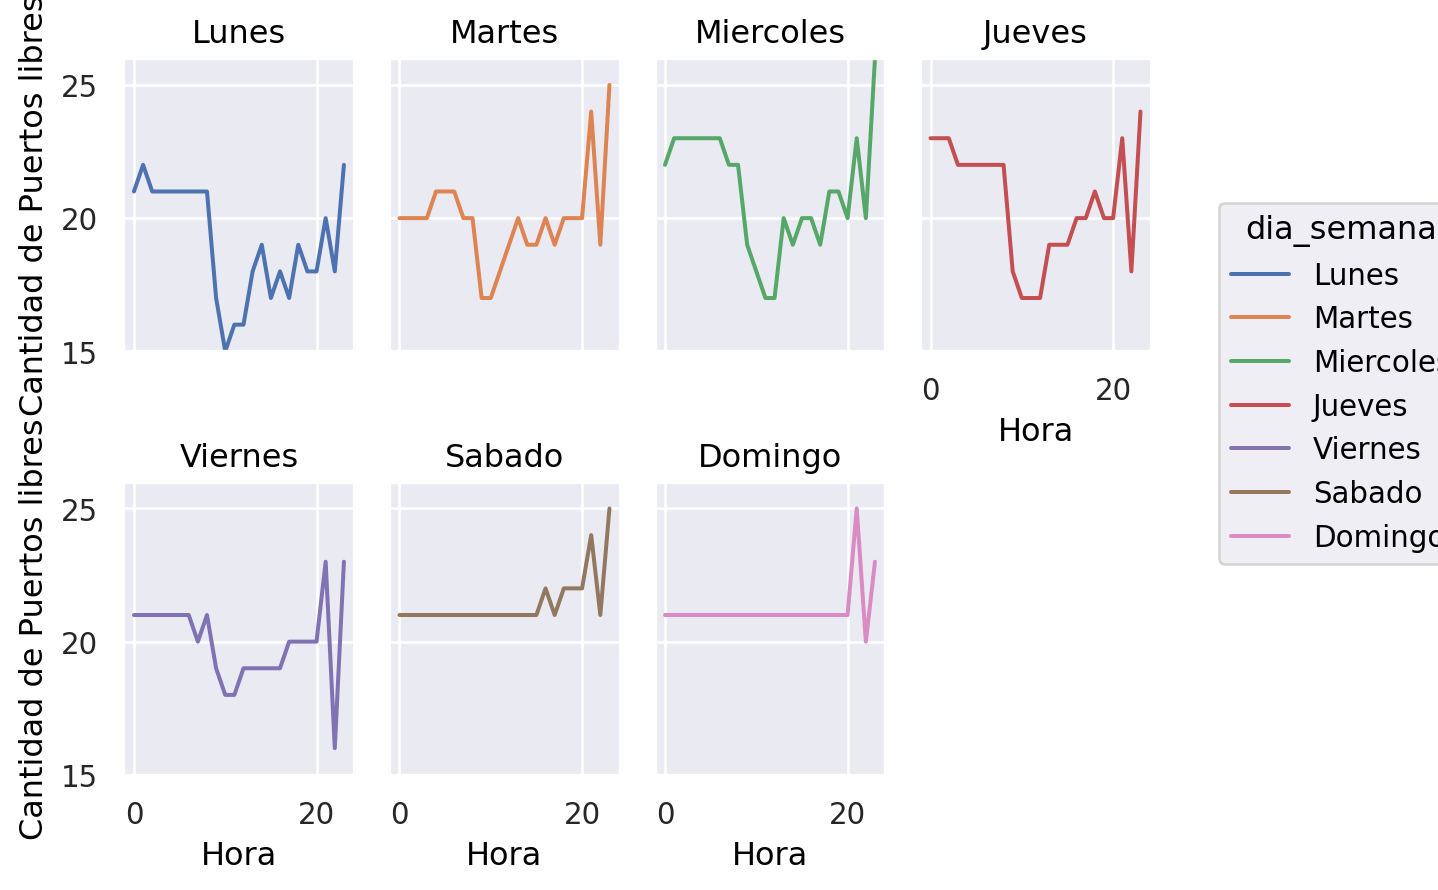

In [38]:
# Gráficamos la cantidad promedio de puertos disponibles para cada día de la semana:

(
    so.Plot(data = cantidades_promedios,x = "hora", y = "cantidad_puertos_disponibles(promedio)",color="dia_semana")
    .facet(col="dia_semana", wrap=4)
    .add(so.Line())
    .limit(y=(min_puertos, max_puertos))
    .label(x="Hora",y="Cantidad de Puertos libres")
)

A partir de los gráficos  observamos que durante los días hábiles
(De lunes a viernes) la cantidad promedio de bicicletas disponibles disminuye marcadamente en horas de la mañana coincidiendo con los horarios de ingreso a las actividades académicas y laborales.

Posteriormente se observa una recuperación hacia el mediodía,
y en algunos casos una nueva disminución por la tarde.

Los puertos disponibles presentan el comportamiento inverso,
lo cual es consistente con el uso del sistema.

Durante los fines de semana el patrón es considerablemente
más estable, sin caídas pronunciadas, lo que sugiere
una menor demanda del sistema.

Esta tendencia puede explicarse por el carácter académico
de Ciudad Universitaria, donde el uso del sistema está
fuertemente asociado a los horarios de cursada.

## Ejercicio 12

En los gráficos que realizaste hay algunos valores que parezcan incorrectos o mal medidos?
¿Cómo lo podrías justificar?


En los gráficos encontramos algunas variaciones abruptas, especialmente en las últimas horas del día, donde se registran
caídas o aumentos pronunciados en la cantidad de bicicletas
y puertos disponibles.

Por ejemplo, el martes la cantidad promedio de bicicletas disponibles
desciende de aproximadamente 9–10 bicicletas a solo 3–4 alrededor de
las 22–23 hs. Algo similar ocurre el domingo, donde se mantiene cerca
de 9 bicicletas durante el día y cae abruptamente a alrededor de 3 en
la última franja horaria.

En el caso de los puertos disponibles, el miércoles se observa un salto
desde aproximadamente 17 hasta más de 26 puertos libres en la última
hora del día. También el viernes presenta una caída marcada cercana a
los 16 puertos seguida de un aumento abrupto.

Las caídas abruptas observadas alrededor de las 22–23 hs pueden
explicarse por el horario de finalización de clases en Ciudad
Universitaria. En ese momento, una gran cantidad de personas
retira bicicletas para regresar a sus hogares.

Esto provoca una disminución marcada en la cantidad de bicicletas
disponibles y, simultáneamente, un aumento en la cantidad de puertos
libres, ya que las bicicletas dejan de estar ancladas.


# Análisis exploratorio

## Ejercicio 13

 La idea de este ítem es que realicen un análisis exploratorio de los datos, aplicando las herramientas de visualización (seaborn.objects, seaborn y/o matplotlib), de resumen de datos
(media, mediana, desvío estándar, operaciones sobre el DataFrame, etc.) y/o de Regresión.
El objetivo es entender, comparar y/o estudiar el uso de las bicis en Ciudad Universitaria.

Con el objetivo de comprender la dinámica de uso del sistema de bicicletas en Ciudad Universitaria, realizamos un análisis exploratorio centrado en la evolución temporal de la disponibilidad de bicicletas.

Dado que una menor cantidad de bicicletas disponibles implica un mayor uso del sistema, se utilizará el promedio de bicicletas disponibles como indicador indirecto del nivel de demanda.

Se analizarán patrones temporales semanales y mensuales, diferencias entre días hábiles y fines de semana, medidas de dispersión y una regresión lineal simple para evaluar posibles tendencias temporales.

In [39]:
# Creamos la variable semana:

datos_agrupados["semana"] = datos_agrupados["fecha"].dt.isocalendar().week

# Para analizar el uso semanal de las bicis necesitamos identificar a qué semana pertenece cada fecha.
# La variable fecha ya está en formato datetime (la transformación se usó en Análisis Descriptivo).
# utilizamos el método .dt.isocalendar().week para extraer el número de semana correspondiente a cada observación.
# Utilizamos las herramientas de manipulación de fechas que ofrece pandas para poder agrupar los datos temporalmente.

In [40]:
# Para el uso semanal, con el promedio de cantidad de bicis disponibles:

uso_semanal = (
    datos_agrupados
    .groupby("semana", as_index=False)
    .agg({
        "cantidad_bicis_disponibles": "mean"
    })
)

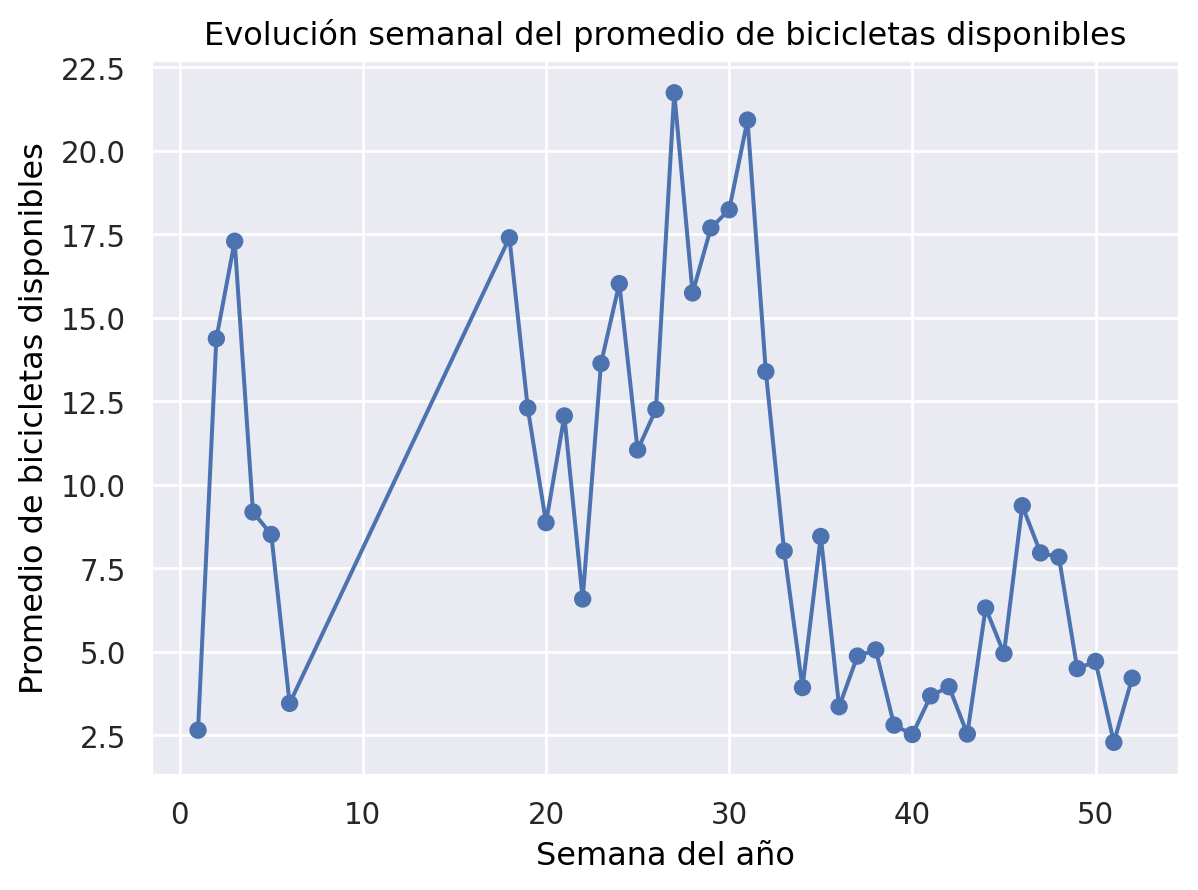

In [41]:
# Graficamos el uso semanal:

(
    so.Plot(
        uso_semanal,
        x="semana",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Line())
    .add(so.Dot())
    .label(
        x="Semana del año",
        y="Promedio de bicicletas disponibles",
        title="Evolución semanal del promedio de bicicletas disponibles"
    )
)

Observación: El dataset empieza desde abril de 2025 hasta febrero de 2026, no cuenta con datos de marzo. Eso se ve representado en el gran salto de la gráfica.

In [42]:
# Para ver las semanas con menor disponibilidad de bicis (es decir, cuando hay un mayor uso de las mismas):

uso_semanal.sort_values("cantidad_bicis_disponibles").head()

,semana,cantidad_bicis_disponibles
39,51,2.290323
28,40,2.525000
31,43,2.537975
0,1,2.653595
27,39,2.806452


In [43]:
# # Para las semanas con mayor disponibilidad de bicis (es decir, cuando hay un menor uso de las mismas):

uso_semanal.sort_values("cantidad_bicis_disponibles", ascending=False).head()

,semana,cantidad_bicis_disponibles
15,27,21.738462
19,31,20.922078
18,30,18.236842
17,29,17.692810
6,18,17.397059


Las semanas 27 a 31 presentan los valores más altos de disponibilidad promedio, coincidiendo temporalmente con el inicio del segundo cuatrimestre universitario. Esto sugiere una mayor demanda inicial, consistente con el retorno masivo a clases.

Se observan fluctuaciones significativas en la disponibilidad promedio a lo largo del año, lo que sugiere que el uso del sistema no es uniforme y presenta períodos de mayor y menor demanda.

Analizamos el comportamiento en los dias hábiles y los fines de semana.

In [44]:
# Creamos las variables dia_num y fin_de_semana.

# Observación: Se crea la nueva variable dia_num para no pisar la variable dia_semana.

datos_agrupados["dia_num"] = datos_agrupados["fecha"].dt.dayofweek # Usamos dayofweek, dado que ya tenemos la fecha en formato datetime.


datos_agrupados["fin_de_semana"] = datos_agrupados["dia_num"] >= 5

In [45]:
datos_agrupados["dia_num"]

0       0
1       1
2       1
3       1
4       1
       ..
6259    4
6260    4
6261    4
6262    4
6263    4
Name: dia_num, Length: 6264, dtype: int32

In [46]:
datos_agrupados["fin_de_semana"]

0       False
1       False
2       False
3       False
4       False
        ...  
6259    False
6260    False
6261    False
6262    False
6263    False
Name: fin_de_semana, Length: 6264, dtype: bool

In [47]:
# Estadísticos para comparar los días. Con la media(mean), la mediana(median) y la desviación estándar(std):

comparacion_dias = (
    datos_agrupados
    .groupby("fin_de_semana")["cantidad_bicis_disponibles"]
    .agg(["mean", "std", "median"])
)

comparacion_dias

,mean,std,median
fin_de_semana,,,
False,9.317246,7.266476,8.0
True,8.496279,7.631952,7.0


In [48]:
# Resumimos para graficar con el promedio:

resumen_dias = (
    datos_agrupados
    .groupby("fin_de_semana", as_index=False)
    .agg({
        "cantidad_bicis_disponibles": "mean"
    })
)

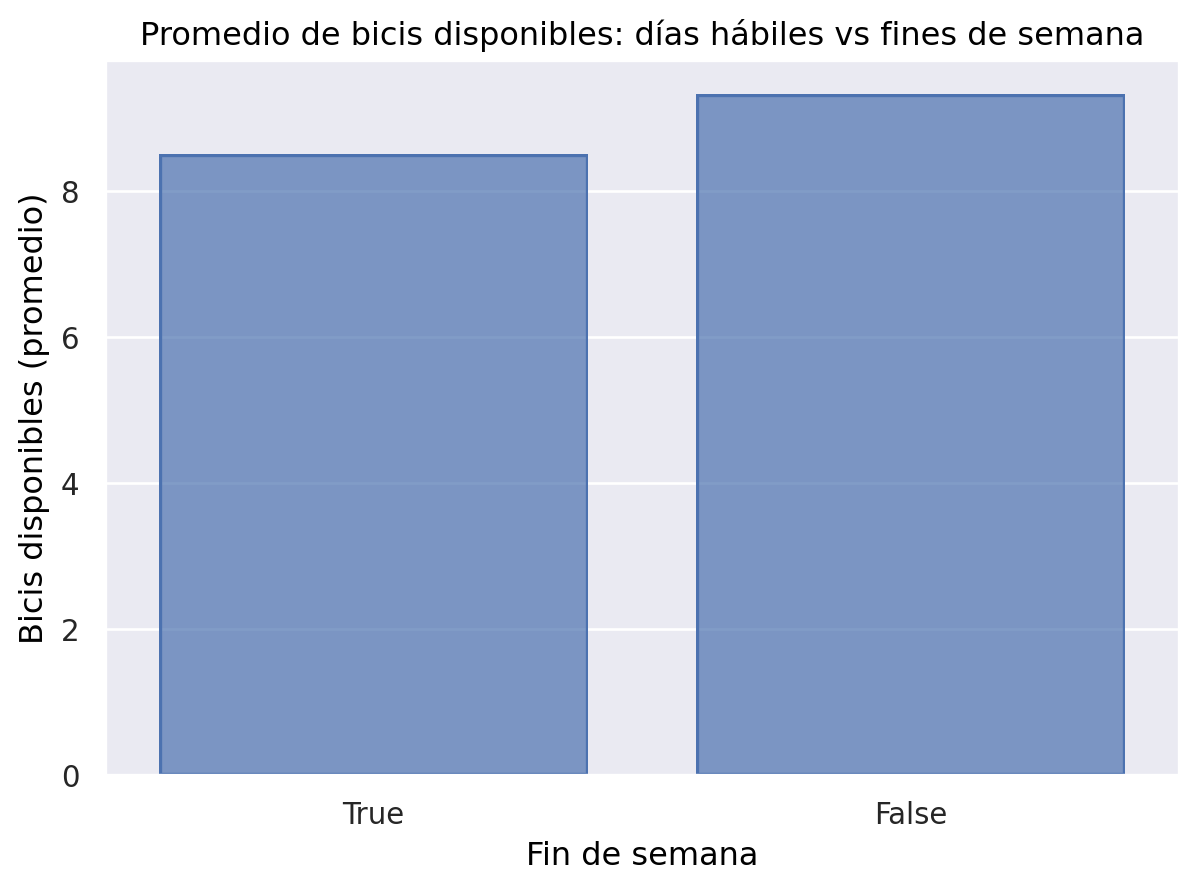

In [49]:
(
    so.Plot(
        resumen_dias,
        x="fin_de_semana",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Bar())
    .label(
        title="Promedio de bicis disponibles: días hábiles vs fines de semana",
        x="Fin de semana",
        y="Bicis disponibles (promedio)"
    )
)

Se puede ver que el promedio de bicicletas disponibles durante días hábiles es de 9.32, mientras que durante los fines de semana es 8.50.

La mediana también es ligeramente mayor en días hábiles (8) que en fines de semana (7), lo que indica que la diferencia no se debe únicamente a valores extremos.

En cuanto a la variabilidad, el desvío estándar es similar en ambos casos (7.27 en días hábiles y 7.63 en fines de semana), lo que sugiere que la dispersión de la disponibilidad es comparable entre ambos tipos de día.

En términos generales, los datos muestran una disponibilidad promedio ligeramente mayor durante días hábiles, lo que podría estar asociado a un mayor recambio de bicicletas por uso académico y laboral en Ciudad Universitaria. La diferencia es pequeña (menos de una bicicleta en promedio), lo cual muestra que el sistema mantiene un comportamiento relativamente estable entre semana y fines de semana.

Analizamos el uso mensual y si existe un patrón estacional más claro que el de fines de semana vs días hábiles.

In [50]:
# Calculamos el uso promedio por mes:

promedio_mensual = (
    datos_agrupados
    .groupby("mes", as_index=False)
    .agg({
        "cantidad_bicis_disponibles": "mean"
    })
)

promedio_mensual

,mes,cantidad_bicis_disponibles
0,1,11.212575
1,2,4.036036
2,4,16.130435
3,5,11.237216
4,6,13.058104
5,7,18.249622
6,8,9.941945
7,9,4.026588
8,10,3.830725
9,11,7.233284


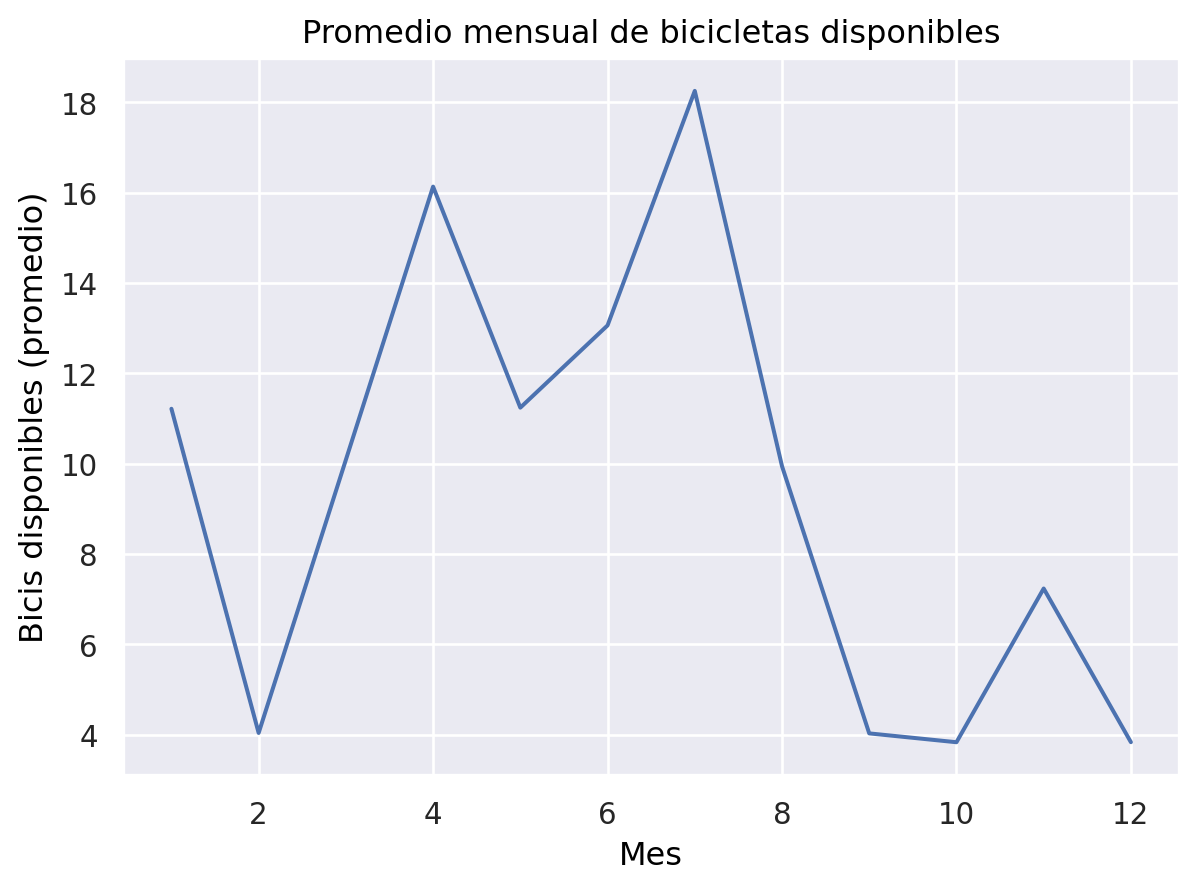

In [51]:
# Graficamos:

(
    so.Plot(
        promedio_mensual,
        x="mes",
        y="cantidad_bicis_disponibles"
    )
    .add(so.Line())
    .label(
        title="Promedio mensual de bicicletas disponibles",
        x="Mes",
        y="Bicis disponibles (promedio)"
    )
)

El análisis mensual muestra variaciones importantes a lo largo del año. Los valores promedio más altos se registran en:

  - Julio (mes 7): 18.25 bicicletas.

  - Abril (mes 4): 16.13 bicicletas.

  - Junio (mes 6): 13.06 bicicletas.

A su vez, los valores más bajos se observan en:

  - Octubre (mes 10): 3.83 bicicletas.

  - Diciembre (mes 12): 3.83 bicicletas.

  - Septiembre (mes 9): 4.03 bicicletas.

  - Febrero (mes 2): 4.04 bicicletas.

Encontramos un pico muy marcado en julio y abril, y una caída pronunciada en el último trimestre del año. En julio se da el receso invernal, lo cual puede explicar el promedio alto de dispinibilidad: Con una menor demanda, debería haber más bicicletas disponibles. A su vez, en septiembre y octubre se evidencia una disponibilidad baja, lo que puede indicar un mayor uso y es coincidente con que en esos meses se está en pleno cuatrimestre.

Esto sugiere que la disponibilidad de bicicletas no es uniforme a lo largo del año y podría estar asociada a cambios en la demanda, períodos académicos o estacionalidad climática.


Analizamos ahora la relación de las semanas con mayor uso y los inicios de cuatrimestre.

In [52]:
# El uso promedio por semana:

uso_semanal = (
    datos_agrupados
    .groupby("semana", as_index=False)
    .agg({
        "cantidad_bicis_disponibles": "mean"
    })
)

uso_semanal.head()

,semana,cantidad_bicis_disponibles
0,1,2.653595
1,2,14.377483
2,3,17.293333
3,4,9.185430
4,5,8.513514


In [53]:
# Identificamos cuales son las semanas que presentan un mayor uso (es decir, una menor disponibilidad de bicis):

uso_semanal.sort_values("cantidad_bicis_disponibles").head()

,semana,cantidad_bicis_disponibles
39,51,2.290323
28,40,2.525000
31,43,2.537975
0,1,2.653595
27,39,2.806452


In [54]:
# Y cuales presentan un menor uso (es decir, una mayor disponibilidad de bicis):

uso_semanal.sort_values("cantidad_bicis_disponibles", ascending=False).head()

,semana,cantidad_bicis_disponibles
15,27,21.738462
19,31,20.922078
18,30,18.236842
17,29,17.692810
6,18,17.397059


Encontramos dos patrones fuertes:

  - Pico de disponibilidad (bajo uso): Las semanas 27 a 31 presentan entre 18 y 22 bicicletas disponibles en promedio. Estas semanas coinciden aproximadamente con el receso invernal de julio, lo cual es consistente con una menor demmanda por la disminución en las actividades académicas y por lo tanto un mayor número de bicicletas disponibles.

  - Mínimos de disponibilidad (alto uso): Las semanas 39 a 43 y 51 muestran promedios muy bajos (2–3 bicicletas). Estas semanas corresponden aproximadamente al pleno segundo cuatrimestre, con octubre y noviembre, y finales de año, lo cual es consistente con una mayor demanda.

  Continuamos el análisis para contrastarlo con el inicio de cuatrimestre. Dado que el dataset no contiene datos del mes de marzo, no es posible analizar el inicio del primer cuatrimestre. El análisis se limita al inicio del segundo cuatrimestre. Suponemos: Inicio segundo cuatrimestre ≈ semanas 31–34.

In [55]:
uso_semanal["inicio_cuatrimestre"] = uso_semanal["semana"].isin([31, 32, 33])

In [56]:
uso_semanal.groupby("inicio_cuatrimestre")["cantidad_bicis_disponibles"].mean()

inicio_cuatrimestre
False     8.746946
True     14.110348
Name: cantidad_bicis_disponibles, dtype: float64

Al comparar los promedios semanales obtenemos para el resto del año 8.75 bicicletas disponibles y para el inicio del segundo cuatrimestre: 14.11 bicicletas disponibles, en promedio.

Esto indica que durante el inicio del segundo cuatrimestre hay mayor disponibilidad de bicicletas, lo que implica un menor uso relativo en comparación con el resto del año.

Por lo tanto, en este dataset no se observa un aumento del uso en el inicio del segundo cuatrimestre. Esto podría deberse a factores climáticos (agosto es un mes frío) o a un inicio gradual de la actividad académica.

Vamos a analizar como las variables climaticas afectan, en caso de que lo hagan, el uso de las bicis. Sería intuitivo pensar que en los dias con precipitaciones o aquellos en los cuales las temperaturas estan por fuera de cierto rango, las personas optarían por otro medio de transporte que los resguarde de estas condiciones "adversas". Lo estudiamos.

In [57]:
# Cargamos el dataset clima.csv:

clima = pd.read_csv("clima.csv")

# Convertimos la columna de fecha a formato datetime:

clima["fecha"] = pd.to_datetime(clima["fecha"])

El dataset contiene las siguientes variables:

  - tavg: temperatura promedio diaria.

  - tmin: temperatura mínima diaria.

  - tmax: temperatura máxima diaria.

  - prcp: precipitación acumulada diaria.

  - wspd: velocidad del viento.

  - pres: presión atmosférica.

La columna "Unnamed: 0" corresponde a un índice exportado y no contiene información relevante. La columna "fecha_relativa" tampoco aporta información necesaria para este análisis, por lo que eliminamos ambas.

Para el análisis utilizaremos principalmente: tmax y tmin, ya que la temperatura puede influir en la predisposición al uso de bicicletas, y
prcp dado que la lluvia puede desincentivar la movilidad en bicicleta.

No incluímos la presión atmosférica ni la velocidad del viento en el modelo principal, ya que su interpretación en términos de comportamiento de movilidad urbana no es directa.

In [58]:
# Eliminamos columnas que no aportan información relevante:

clima = clima.drop(columns=["Unnamed: 0", "fecha_relativa"])

clima.head()

,fecha,tavg,tmin,tmax,prcp,wspd,pres
0,2025-03-01,24.7,21.5,27.4,0.0,10.8,1009.8
1,2025-03-02,23.4,21.0,24.7,13.7,16.8,1015.0
2,2025-03-03,23.5,19.3,25.3,29.8,12.5,1013.7
3,2025-03-04,24.9,21.1,27.2,19.1,19.3,1012.7
4,2025-03-05,27.8,23.6,31.1,15.0,9.8,1010.0


Para el análisis generamos un nuevo dataframe datos_clima a partir de los datos de uso y los datos del clima.

In [59]:
# Unimos los datos de uso con los datos del clima.
# Usamos "how=inner", con "fecha" como referencia, y descartamos los índices.

datos_clima = datos_agrupados.merge(
    clima,
    on="fecha",
    how="inner"
)

datos_clima.head()

,fecha,hora,dia_semana,dia,mes,anio,cantidad_bicis_disponibles,cantidad_bicis_rotas,cantidad_puertos_disponibles,estacion_anio,semana,dia_num,fin_de_semana,tavg,tmin,tmax,prcp,wspd,pres
0,2025-04-28,23,Lunes,28,4,2025,14,3,15,Otoño,18,0,False,16.9,12.3,22.5,0.0,5.6,1017.5
1,2025-04-29,0,Martes,29,4,2025,16,3,13,Otoño,18,1,False,16.6,11.8,21.5,0.0,6.3,1017.4
2,2025-04-29,1,Martes,29,4,2025,16,3,13,Otoño,18,1,False,16.6,11.8,21.5,0.0,6.3,1017.4
3,2025-04-29,2,Martes,29,4,2025,16,3,13,Otoño,18,1,False,16.6,11.8,21.5,0.0,6.3,1017.4
4,2025-04-29,3,Martes,29,4,2025,16,3,13,Otoño,18,1,False,16.6,11.8,21.5,0.0,6.3,1017.4


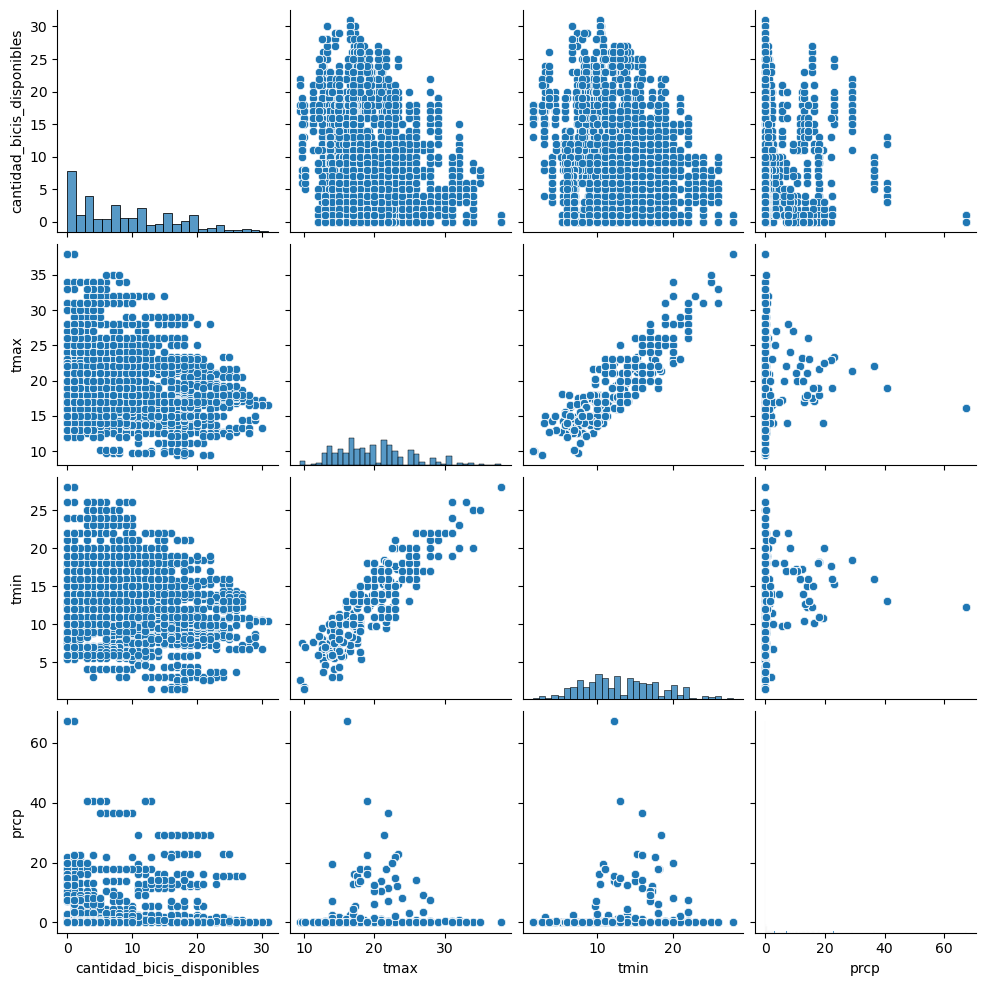

In [60]:
# Exploramos las relaciones entre la disponibilidad de bicicletas y las variables climáticas, antes de proceder con los análisis específicos:

sns.pairplot(
    datos_clima[["cantidad_bicis_disponibles", "tmax", "tmin", "prcp"]]
)

Con el pairplot observamos de manera global las relaciones entre variables climáticas y disponibilidad de bicicletas.

In [61]:
# Para cuantificar lo observado en el gráfico podemos calcular las correlaciones con la variable disponibilidad, usando .corr():

datos_clima[["cantidad_bicis_disponibles", "tmax", "tmin", "prcp"]].corr()

,cantidad_bicis_disponibles,tmax,tmin,prcp
cantidad_bicis_disponibles,1.000000,-0.366935,-0.366974,-0.065114
tmax,-0.366935,1.000000,0.897945,0.000815
tmin,-0.366974,0.897945,1.000000,0.110915
prcp,-0.065114,0.000815,0.110915,1.000000


La temperatura máxima y mínima presentan una correlación negativa  y moderada ( de aproximadamente -0.37) con la disponibilidad de bicicletas. Esto nos sugiere que en días más cálidos la disponibilidad disminuye, lo que indica un mayor uso del sistema.

La precipitación muestra una correlación muy baja (de aproximadamente -0.065) con la disponibilidad. Esto nos indica que, al menos desde una perspectiva de relación lineal simple, la lluvia no parece afectar de manera significativa la disponibilidad promedio. Tal vez la relación con la lluvia no es lineal. Estudiamos a continuación con mayor profundidad que pasa con las precipitaciones.

Finalmente, se observa una alta correlación entre la temperatura mínima y máxima (de aproximadamente 0.90), lo cual sugiere que no sería conveniente incluir ambas variables simultáneamente en un modelo lineal.

<Axes: xlabel='prcp'>

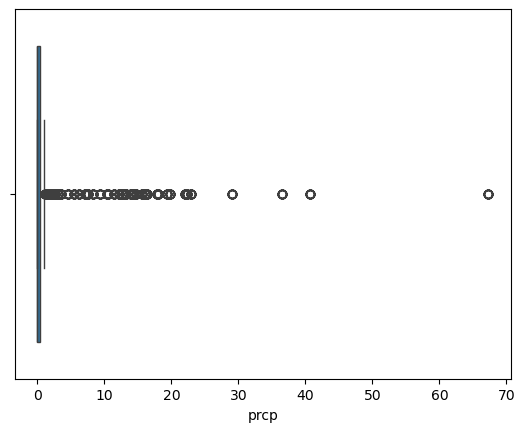

In [62]:
# Graficamos un boxplot con las precipitaciones para revisar como se comportan sus datos:

sns.boxplot(x=datos_clima["prcp"])

El gráfico de cajas muestra que la mayoría de los valores de precipitación son cero, con algunos valores extremos positivos. Tiene una distribución muy asimétrica, esto puede dificultar la detección de una relación lineal mediante correlación simple.

Creamos una variable binaria que distingue entre días con lluvia y sin lluvia para analizar si la sola presencia de precipitaciones influye en la disponibilidad de las bicicletas.

In [63]:
datos_clima["llovio"] = datos_clima["prcp"] > 0

datos_clima["llovio"].value_counts()

llovio
False    3783
True     1702
Name: count, dtype: int64

In [64]:
# Comparamos la  media, el desvío estándar y la mediana de disponibilidad entre días con lluvia y sin lluvia.
# Esto nos permite evaluar si existe una diferencia sistemática entre ambos grupos:

comparacion_lluvia = (
    datos_clima
    .groupby("llovio")["cantidad_bicis_disponibles"]
    .agg(["mean", "std", "median"])
)

comparacion_lluvia

,mean,std,median
llovio,,,
False,9.392810,7.722656,8.0
True,7.907168,6.584830,7.0


La comparación entre días con y sin lluvia nos muestra que la disponibilidad promedio es menor en días con precipitaciones (7.91) que en días sin lluvia (9.39).

Una menor disponibilidad implica mayor uso del sistema, luego este resultado parece sugerir que, en promedio, los días con lluvia no presentan una disminución clara en el uso de bicicletas.

Dado que la correlación lineal entre la precipitación y la disponibilidad resultó baja, en contra de la intuición inicial de esperar que la lluvia desincentive el uso de las bicicletas, proponemos un análisis categórico para buscar posibles efectos no lineales.

Clasificamos los días en tres categorías según la intensidad de la precipitación: sin lluvia (prcp = 0), lluvia leve (0 < prcp ≤ 2) y lluvia significativa (prcp > 2).

In [65]:
# Clasificamos los días según la intensidad de la lluvia:

def clasificar_lluvia(prcp):
    if prcp == 0:
        return "Sin lluvia"
    elif prcp <= 2:
        return "Lluvia leve"
    else:
        return "Lluvia significativa"

datos_clima["categoria_lluvia"] = datos_clima["prcp"].apply(clasificar_lluvia)

datos_clima["categoria_lluvia"].value_counts()

categoria_lluvia
Sin lluvia              3783
Lluvia significativa     919
Lluvia leve              783
Name: count, dtype: int64

In [66]:
# Comparamos los promedios:

comparacion_lluvia = (
    datos_clima
    .groupby("categoria_lluvia")["cantidad_bicis_disponibles"]
    .agg(["mean", "std", "median"])
)

comparacion_lluvia

,mean,std,median
categoria_lluvia,,,
Lluvia leve,8.054917,5.934924,7.0
Lluvia significativa,7.781284,7.092529,6.0
Sin lluvia,9.392810,7.722656,8.0


El análisis por intensidad de lluvia muestra que la disponibilidad promedio es mayor en días sin precipitaciones (9.39), y menor en días con lluvia leve (8.05) y lluvia significativa (7.78).

Dado que una menor disponibilidad implica un mayor uso del sistema, estos resultados nos indican que no se observa una disminución marcada del uso en días lluviosos. Las diferencias entre categorías existen, pero no son muy pronunciadas.

Este comportamiento puede deberse a varios factores. La variable que analizamos se corresponde con la disponibilidad diaria en promedio, donde el promedio puede suavizar efectos horarios puntuales de lluvia intensa. Además, muchas precipitaciones registradas son leves y podrían no afectar significativamente la decisión de utilizar bicicleta. Finalmente, acciones como la gestión de reposición de las bicicletas puede influir en la disponibilidad observada.

En conclusión, si bien intuitivamente esperamos una disminución en el uso durante días de lluvia, los datos analizados no muestran un impacto fuerte ni lineal de la precipitación sobre la disponibilidad promedio de bicicletas.

In [67]:
# Añadimos un modelo lineal simple para seguir evaluando este efecto de las precipitaciones. Las variables:

# Variable explicativa (la convertimos a numérica para usarla):

X = datos_clima[["llovio"]].astype(int)

# Variable objetivo:

y = datos_clima["cantidad_bicis_disponibles"]

In [68]:
# Ajustamos el modelo:

modelo_lluvia = linear_model.LinearRegression()

modelo_lluvia.fit(X, y)

print("Intercepto:", modelo_lluvia.intercept_)
print("Coeficiente llovio:", modelo_lluvia.coef_[0])

Intercepto: 9.392809939201692
Coeficiente llovio: -1.4856419015988718


In [69]:
# Evaluamos el valor de R² y el MSE:

y_pred = modelo_lluvia.predict(X)

print("R²:", modelo_lluvia.score(X, y))
print("MSE:", mean_squared_error(y, y_pred))

R²: 0.008581848389233704
MSE: 54.5691188660506


Ajustamos un modelo de regresión lineal simple utilizando como variable explicativa la variable binaria que indica si hubo lluvia. El coeficiente estimado para la variable llovió es negativo, lo que nos indica que en días con precipitaciones la disponibilidad promedio es menor.

Sin embargo, el coeficiente R² ≈ 0.009 que obtuvimos es muy bajo, lo que indica que la lluvia explica menos del 1% de la variabilidad observada en la disponibilidad de bicicletas.

Esto confirma lo observado en el análisis descriptivo: si bien existe una diferencia promedio entre días con y sin lluvia, el efecto no es fuerte en términos explicativos. La variabilidad en la disponibilidad parece estar influenciada por otros factores.

# Regresión lineal

En esta sección, queremos analizar el uso de bicis en otras estaciones de la Ciudad. Para eso vamos
a utilizar el dataset viajes-por-dia.csv con la cantidad de viajes por hora realizados desde cada
estación y cantidad de viajes por hora realizados hacia cada estación.


El objetivo es modelar la variable origen_5, correspondiente a la estación 005 - Plaza Italia.

In [70]:
# Cargamos el dataset viajes_diarios.csv, que contiene la cantidad de viajes por hora con origen y destino en distintas estaciones de la ciudad:

viajes = pd.read_csv("viajes_diarios.csv")

viajes.head()

,fecha,origen_2,origen_3,origen_4,origen_5,origen_6,origen_7,origen_8,origen_9,origen_12,...,destino_567,destino_568,destino_569,destino_570,destino_572,destino_573,destino_574,destino_575,destino_576,destino_577
0,2024-01-01,13,24,39,45,0,27,28,32,20,...,0,0,0,0,0,0,0,0,0,0
1,2024-01-02,27,58,85,123,27,38,90,65,31,...,0,0,0,0,0,0,0,0,0,0
2,2024-01-03,40,67,65,144,33,18,113,71,39,...,0,0,0,0,0,0,0,0,0,0
3,2024-01-04,39,53,66,98,35,42,103,66,35,...,0,0,0,0,0,0,0,0,0,0
4,2024-01-05,27,63,50,84,46,28,93,60,32,...,0,0,0,0,0,0,0,0,0,0


Hacemos una inspección del DataFrame para verificar:

  - Tipos de variables

  - Cantidad de observaciones

  - Existencia de valores faltantes

In [71]:
viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Columns: 794 entries, fecha to destino_577
dtypes: int64(793), object(1)
memory usage: 2.2+ MB


In [72]:
# Revisamos los tipos de datos en viajes:

viajes.dtypes

fecha          object
origen_2        int64
origen_3        int64
origen_4        int64
origen_5        int64
                ...  
destino_573     int64
destino_574     int64
destino_575     int64
destino_576     int64
destino_577     int64
Length: 794, dtype: object

Se observa que La columna fecha es de tipo object y el resto de las variables son de tipo int64.

In [73]:
# Revisamos si hay valores faltantes:

print(viajes.isna().sum())

print("La suma de la cantidad de datos faltantes en todas las columnas es", viajes.isna().sum().sum())

fecha          0
origen_2       0
origen_3       0
origen_4       0
origen_5       0
              ..
destino_573    0
destino_574    0
destino_575    0
destino_576    0
destino_577    0
Length: 794, dtype: int64
La suma de la cantidad de datos faltantes en todas las columnas es 0


No encontramos datos faltantes, por lo que no es necesario realizar una limpieza adicional.

## Ejercicio 15

Se quiere ajustar la cantidad de viajes con origen en la estación 005 - Plaza Italia en función de
viajes originados en otras estaciones o con destino en distintas estaciones. Es decir, queremos
hacer un modelo para ajustar la variable origen_5 en función de otras variables del DataFrame.

In [74]:
# Verificamos que esté presente la variable a modelar, origen_5:

viajes.columns


Index(['fecha', 'origen_2', 'origen_3', 'origen_4', 'origen_5', 'origen_6',
       'origen_7', 'origen_8', 'origen_9', 'origen_12',
       ...
       'destino_567', 'destino_568', 'destino_569', 'destino_570',
       'destino_572', 'destino_573', 'destino_574', 'destino_575',
       'destino_576', 'destino_577'],
      dtype='object', length=794)

Definimos como variable dependiente a la cantidad de viajes con origen en la estación 005 - Plaza Italia (origen_5). Para definir las variables explicativas:

  - Excluimos origen_5 porque es la variable dependiente.

  -  Excluimos fecha porque es una variable categórica (de tipo object) y no forma parte del modelo explicativo solicitado.

Utilizamos las demás variables numéricas disponibles como posibles variables explicativas.

In [75]:
# Definimos la variable dependiente:

variable_objetivo = viajes["origen_5"]

In [76]:
# Definimos las variables explicativas:

variables_explicativas = viajes.drop(columns=["origen_5", "fecha"])

In [77]:
# Inicializamos el modelo de regresión lineal multiple:

modelo = linear_model.LinearRegression()

In [78]:
# Ajustamos el modelo:

modelo.fit(variables_explicativas, variable_objetivo)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [79]:
# Vemos el intercepto y el número de coeficientes:

print("Intercepto:", modelo.intercept_)
print("Cantidad de coeficientes estimados:", len(modelo.coef_))

Intercepto: -0.45232940287488077
Cantidad de coeficientes estimados: 792


In [80]:
# Calculamos el coeficiente R² para medir qué proporción de la variabilidad de origen_5 es explicada por el modelo.
# También calculamos el Error Cuadrático Medio (MSE), que mide el error promedio de las predicciones.

predicciones = modelo.predict(variables_explicativas)

r2 = r2_score(variable_objetivo, predicciones)
mse = mean_squared_error(variable_objetivo, predicciones)

print("R²:", r2)
print("MSE:", mse)

R²: 1.0
MSE: 1.0417709669307077e-25


Del modelo obtenemos un R² igual a 1 y un MSE prácticamente nulo.
Es decir, un ajuste prácticamente perfecto sobre los datos.

Sin embargo, este resultado sugiere que tenemos un fuerte sobreajuste, pues estamos utilizando 792 variables explicativas para explicar una sola variable respuesta.
Además, estamos evaluando el desempeño sobre el mismo conjunto de datos utilizado para entrenar el modelo.

Por lo tanto, si bien el ajuste es perfecto en muestra, no podemos garantizar su capacidad predictiva fuera de muestra.

El R² = 1 podría sugerir un sobreajuste perfecto posiblemente debido a que hay colinealidad o por la inclusión de variables directamente relacionadas con la variable objetivo.

A continuación realizamos el análisis limitando a 5 el número de variables explicativas, usando validación y comparando distintos modelos.

## Ejercicio 16

Propongan tres modelos de regresión distintos. En cada modelo, pueden utilizarse a lo sumo 5
variables explicativas (pueden ser variables distintas en los distintos modelos). Los criterios de
selección de esas 5 columnas los determinan ustedes arbitrariamente, y deben estar explicitados
en el informe.

**Modelo 1 – Criterio de cercanía.**

Construimos el modelo utilizando cinco estaciones cuya numeración es cercana a la estación 005 – Plaza Italia.

La hipótesis que usamos es que estaciones con numeración próxima podrían pertenecer a una misma zona urbana o compartir características similares en términos de demanda.

Si bien la numeración no garantiza proximidad geográfica exacta, la tomamos como criterio exploratorio inicial para evaluar posibles relaciones locales en la movilidad.

Las variables seleccionadas son origen_4, origen_6, destino_4, destino_6, origen_7. Incluimos variables tanto de origen como de destino pues los sistemas de sistema de movilidad son interdependientes: los flujos de llegada y de salida en distintas estaciones pueden estar relacionados entre sí.

In [81]:
# Definimos las variables explicativas para el Modelo 1:

variables_modelo_1 = [
    "origen_4",
    "origen_6",
    "destino_4",
    "destino_6",
    "origen_7"
]

In [82]:
X_modelo_1 = viajes[variables_modelo_1]
y = variable_objetivo

In [83]:
# Ajustamos el modelo:

modelo_1 = linear_model.LinearRegression()
modelo_1.fit(X_modelo_1, y)

predicciones_modelo_1 = modelo_1.predict(X_modelo_1)

In [84]:
# Calculamos el coeficiente de determinación R² y el Error Cuadrático Medio (MSE):

r2_modelo_1 = r2_score(y, predicciones_modelo_1)
mse_modelo_1 = mean_squared_error(y, predicciones_modelo_1)

print("Modelo 1 - R²:", r2_modelo_1)
print("Modelo 1 - MSE:", mse_modelo_1)

Modelo 1 - R²: 0.4910731008332325
Modelo 1 - MSE: 822.0380951440239


El Modelo 1 presenta un R² de 0.491, lo que indica que aproximadamente el 49% de la variabilidad en la cantidad de viajes con origen en Plaza Italia es explicada por las cinco variables seleccionadas.

Esto sugiere que las estaciones elegidas capturan parcialmente el comportamiento de la demanda, aunque una parte significativa de la variabilidad permanece sin explicar.

El Error Cuadrático Medio (MSE) obtenido fue de 822.04, lo que refleja el tamaño promedio del error de predicción en el conjunto de entrenamiento.

En comparación con el modelo del Ejercicio 15 (donde utilizabamos todas las variables explicativas y qué presentaba un fuerte sobreajuste), este modelo puede interpretarse conceptualmente con más facilidad, aunque con menor poder explicativo.

**Modelo 2 – Criterio estadístico basado en correlación**

Para este modelo exploramos la correlación entre las variables, buscando identificar aquellas estaciones cuya variación presenta una mayor relación lineal con la demanda en Plaza Italia.

Elegimos las cinco variables con mayor correlación absoluta respecto de la variable objetivo origen_5.

A diferencia del Modelo 1, donde el criterio fue exploratorio basado en numeración, aquí la selección la fundamentamos en evidencia obtenida de los datos.

In [85]:
# Calculamos las corrrelaciones utilizando el método .corr() de sklearn:


correlaciones = viajes.drop(columns=["fecha"]).corr()["origen_5"]
correlaciones = correlaciones.drop("origen_5")

correlaciones_ordenadas = correlaciones.reindex(correlaciones.abs().sort_values(ascending=False).index)

correlaciones_ordenadas.head(10)   # Obtenemos las 10 variables con mayor correlación con origen_5, ordenadas de manera decreciente.



destino_5      0.975403
destino_29     0.795681
origen_29      0.787160
origen_9       0.779723
destino_14     0.778459
destino_9      0.776930
destino_277    0.770779
origen_14      0.770166
origen_277     0.764003
origen_289     0.762231
Name: origen_5, dtype: float64

Encontramos qué destino_5 aparece con una alta correlación (de 0.975403) con origen_5. Es la misma estación 5 y probablemente son fuertemente dependientes.  Usarla como variable para el módelo sería casi volver al problema de sobreajuste del Ejercicio 15. Así que la excluimos y nos quedamos con las cinco siguientes en la tabla.

In [86]:
# Definimos las variables explicativas para el Modelo 2:

variables_modelo_2 = [
    "destino_29",
    "origen_29",
    "origen_9",
    "destino_14",
    "destino_9"
]

In [87]:
X_modelo_2 = viajes[variables_modelo_2]
y = variable_objetivo

In [88]:
# Ajustamos el modelo:

modelo_2 = linear_model.LinearRegression()
modelo_2.fit(X_modelo_2, y)

predicciones_modelo_2 = modelo_2.predict(X_modelo_2)

In [89]:
# Calculamos el coeficiente de determinación R² y el Error Cuadrático Medio (MSE):

r2_modelo_2 = r2_score(y, predicciones_modelo_2)
mse_modelo_2 = mean_squared_error(y, predicciones_modelo_2)

print("Modelo 2 - R²:", r2_modelo_2)
print("Modelo 2 - MSE:", mse_modelo_2)

Modelo 2 - R²: 0.6826564693885251
Modelo 2 - MSE: 512.5853473990842


El Modelo 2 presenta un R² de 0.683, lo que implica que aproximadamente el 68% de la variabilidad en la cantidad de viajes con origen en Plaza Italia es explicada por las cinco variables seleccionadas.

En comparación con el Modelo 1 (R² = 0.491), se observa una mejora sustancial en la capacidad explicativa.

Asimismo, el Error Cuadrático Medio disminuye de 822.04 a 512.59, indicando una mejora en la precisión de las predicciones.

Estos resultados sugieren que la selección basada en correlación empírica permite capturar mejor como se da la dependencia entre estaciones.



**Modelo 3 – Criterio: Estaciones de origen con mayor correlación **

Para este modelo decidimos trabajar exclusivamente con variables correspondientes a estaciones de origen, con el objetivo de analizar si la demanda en Plaza Italia presenta un comportamiento sincronizado con otras estaciones de salida del sistema.

Al igual que en el Modelo 2, utilizamos la correlación como criterio estadístico de selección. Se filtraron únicamente aquellas variables de origen excluyendo a la propia variable origen_5.

Seleccionamos las cinco estaciones de origen con mayor correlación absoluta respecto de la variable objetivo. Estas son: origen_29, origen_9, origen_14, origen_277 y origen_289.

A diferencia del Modelo 2, donde se permitía combinar estaciones de origen y destino, aquí tenemos una estructura más homogénea desde el punto de vista conceptual, lo que permite evaluar específicamente si los patrones de salida del sistema explican mejor la variabilidad observada en Plaza Italia.

In [90]:
# Calculamos las correlaciones:

correlaciones_origen = correlaciones_ordenadas[
    correlaciones_ordenadas.index.str.startswith("origen_")
]

correlaciones_origen.head(10)

origen_29     0.787160
origen_9      0.779723
origen_14     0.770166
origen_277    0.764003
origen_289    0.762231
origen_74     0.734326
origen_200    0.734300
origen_156    0.729389
origen_64     0.728482
origen_202    0.726458
Name: origen_5, dtype: float64

In [91]:
# Definimos las variables explicativas para el Modelo 3:

variables_modelo_3 = [
    "origen_29",
    "origen_9",
    "origen_14",
    "origen_277",
    "origen_289"
]

In [92]:
X_modelo_3 = viajes[variables_modelo_3]
y = variable_objetivo

In [93]:
# Ajustamos el modelo:

modelo_3 = linear_model.LinearRegression()
modelo_3.fit(X_modelo_3, y)

predicciones_modelo_3 = modelo_3.predict(X_modelo_3)

In [94]:
# Calculamos el coeficiente de determinación R² y el Error Cuadrático Medio (MSE):

r2_modelo_3 = r2_score(y, predicciones_modelo_3)
mse_modelo_3 = mean_squared_error(y, predicciones_modelo_3)

print("Modelo 3 - R²:", r2_modelo_3)
print("Modelo 3 - MSE:", mse_modelo_3)

Modelo 3 - R²: 0.7200265775873342
Modelo 3 - MSE: 452.22372648776974


El Modelo 3 presenta un R² de aproximadamente 0.72, lo que indica que logra explicar el 72% de la variabilidad observada en la cantidad de viajes con origen en Plaza Italia.

Además, el Error Cuadrático Medio, de aproximadamente 452.22, es inferior al obtenido en los Modelos 1 y 2, lo que indica una mejor capacidad predictiva.

El hecho de que un modelo compuesto exclusivamente por variables de origen supere a uno que combina origen y destino sugiere que la dinámica de la estación 5 se encuentra más fuertemente asociada a patrones estructurales de salida dentro del sistema que a flujos de llegada.

##Ejercicio 17

Propongan un esquema de validación de los modelos y utilizarlo para seleccionar el mejor de
los tres modelos propuestos.
Importante: Pueden utilizar cualquier criterios para la elección de las variables de cada
modelo, no se pide buscar las 5 mejores variables entre todas las disponibles. Lo que sí tienen
que hacer es explicar entre los 3 modelos que proponen cómo seleccionan el mejor de ellos.

Para seleccionar el mejor modelo entre los propuestos, tenemos que evaluar su capacidad predictiva sobre datos no utilizados durante el entrenamiento. Esto para evitar una estimación demasiado optimista del rendmiento, más aún si tenemos riesgo de sobreajuste.

Siguiendo el procedimiento visto en clase, implementamos una estrategia de partición en entrenamiento y prueba, dividiendo el conjunto de datos en:

- 80% para el entrenamiento

- 20% para la prueba

Si bien la elección 80/20 no es la única posible (podrían utilizarse otras proporciones, como 70/30), esta división representa un equilibrio razonable entre capacidad de estimación y capacidad de validación, y es consistente con el criterio estándar utilizado.

Separamos las variables explicativas (X) y la variable objetivo (y).

Luego hacemos la partición entrenamiento–prueba utilizando train_test_split, fijando random_state=42 para garantizar reproducibilidad en los resultados.

In [95]:
# Definimos las variables:

X = viajes.drop(columns=["fecha", "origen_5"])
y = variable_objetivo

# Separamos los datos:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [96]:
# Entrenamiento del Modelo 1:

modelo_1 = linear_model.LinearRegression()

modelo_1.fit(X_train[variables_modelo_1], y_train)

pred_1 = modelo_1.predict(X_test[variables_modelo_1])

r2_1_test = r2_score(y_test, pred_1)
mse_1_test = mean_squared_error(y_test, pred_1)

print("Modelo 1 - R² test:", r2_1_test)
print("Modelo 1 - MSE test:", mse_1_test)

Modelo 1 - R² test: 0.5557828503458931
Modelo 1 - MSE test: 542.3298404697395


Para el Modelo 1, se obtiene: R² = 0.556 y MSE = 542.33. El modelo explica aproximadamente el 55.6% de la variabilidad fuera de muestra.

In [97]:
# Entrenamiento del Modelo 2:

modelo_2 = linear_model.LinearRegression()

modelo_2.fit(X_train[variables_modelo_2], y_train)

pred_2 = modelo_2.predict(X_test[variables_modelo_2])

r2_2_test = r2_score(y_test, pred_2)
mse_2_test = mean_squared_error(y_test, pred_2)

print("Modelo 2 - R² test:", r2_2_test)
print("Modelo 2 - MSE test:", mse_2_test)

Modelo 2 - R² test: 0.6999929786932935
Modelo 2 - MSE test: 366.26852459829087


Para el Modelo 2, se obtiene: R² = 0.700 y MSE = 366.27. Este modelo explica el 70% de la variabilidad fuera de muestra y reduce considerablemente el error respecto al Modelo 1.

In [98]:
# Entrenamiento del Modelo 3:

modelo_3 = linear_model.LinearRegression()

modelo_3.fit(X_train[variables_modelo_3], y_train)

pred_3 = modelo_3.predict(X_test[variables_modelo_3])

r2_3_test = r2_score(y_test, pred_3)
mse_3_test = mean_squared_error(y_test, pred_3)

print("Modelo 3 - R² test:", r2_3_test)
print("Modelo 3 - MSE test:", mse_3_test)

Modelo 3 - R² test: 0.6805523998749556
Modelo 3 - MSE test: 390.0028761815156


Para el Modelo 3, se obtiene: R² = 0.681 y MSE = 390.00. Aunque este mejora respecto al Modelo 1, no supera al Modelo 2 en desempeño fuera de muestra.

Comparamos los tres modelos. Se tiene:


  - Modelo 1:	R² test = 0.556	 y MSE test = 542.33.

  - Modelo 2:	R² test = 0.700 y MSE test =	366.27.
  
  - Modelo 3:	R² test = 0.681	y MSE test = 390.00.

El Modelo 2 presenta un Mayor R² en test y un menor MSE en test. Por lo tanto, es el que mejor generaliza la relación que estudiamos y por ellos lo seleccionamos como modelo final.

##Ejercicio 18

Para el modelo elegido, indiquen la fórmula final de modelo.

In [99]:
# El intercepto:

print("Intercepto:", modelo_2.intercept_)

for var, coef in zip(variables_modelo_2, modelo_2.coef_):
    print(var, ":", coef)

Intercepto: 11.93975382923206
destino_29 : 0.43241479261649207
origen_29 : 0.10743222846144679
origen_9 : 0.12296522361503018
destino_14 : 0.26452633180428065
destino_9 : 0.14414602029473608


El modelo elegido fue el Modelo 2, dado que presentó el mejor desempeño fuera de la muestra (un mayor R² y un menor MSE en test). Los coeficientes estimados fueron:

- Intercepto: 11.9398

- destino_29: 0.4324

- origen_29: 0.1074

- origen_9: 0.1230

- destino_14: 0.2645

- destino_9: 0.1441

El intercepto (11.94) representa el valor estimado de origen_5 cuando todas las variables explicativas toman valor cero.

El coeficiente de destino_29 (0.4324) indica que, manteniendo constantes las demás variables, un aumento de una unidad en destino_29 se asocia con un incremento promedio de 0.4324 unidades en origen_5. De manera análoga para los otros coeficientes.

El coeficiente obtenido más grande en magnitud es el de destino_29 (0.4324), lo que nos sugiere que esta variable tiene la mayor influencia lineal sobre la demanda en origen_5 dentro del conjunto de variables seleccionadas.

**Fórmula final del modelo lineal estimado**

$$
\widehat{origen\_5}
=
11.9398
+ 0.4324\, destino_{29}
+ 0.1074\, origen_{29}
+ 0.1230\, origen_{9}
+ 0.2645\, destino_{14}
+ 0.1441\, destino_{9}
$$